# GRIP: The Sparks Foundation

# Data Science & Business Analytics Intern¶

 # Task 1 . Predicting Using Supervised ML
 # (Predict the percentage of marks a student can score based on the number of hours he dedicates on his studies.)

# BY Diksha Hiwase.

In [1]:
#importing libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

# Reading csv file and assigning to dataset variable

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
#getting the overview of all the columns in the dataset
dataset.columns

Index(['Hours', 'Scores'], dtype='object')

In [4]:
dataset.rename(columns={'Hours': 'study_hours', 'Scores': 'percentage_scores'}, inplace = True)

In [5]:
#converting percentage_scores column dtype to float32 as percentage_scores can be in decimal 
dataset['study_hours'] = dataset['study_hours'].astype('float32')
dataset['percentage_scores'] = dataset['percentage_scores'].astype('float32')

In [6]:
#first 5 rows content of the dataset
dataset.head()

,study_hours,percentage_scores
0,2.5,21.0
1,5.1,47.0
2,3.2,27.0
3,8.5,75.0
4,3.5,30.0


In [7]:
#checking the columns dtype
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   study_hours        25 non-null     float32
 1   percentage_scores  25 non-null     float32
dtypes: float32(2)
memory usage: 328.0 bytes


In [8]:
#shape of dataset
dataset.shape

(25, 2)

# Plotting the the relationship between percentage_scores and study_hours 

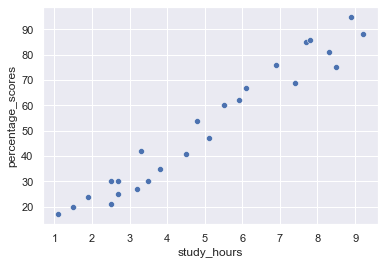

In [9]:
sns.set(style = 'darkgrid')
sns.scatterplot(x = 'study_hours', y = 'percentage_scores', data = dataset)
plt.show()

# Importing the libraries

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [11]:
#initializing the X (independent variables / study_hours) and y (dependent variable / percentage_scores)
X = dataset.drop('percentage_scores', axis = 1)
y = dataset['percentage_scores']

In [12]:
#splitting X and y into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [13]:
#finding the shape of X_train, X_test, y_train, y_test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20, 1), (5, 1), (20,), (5,))

In [14]:
#creating object of our LinearRegression model
model = LinearRegression()

In [15]:
#training our LinearRegression model
model.fit(X_train, y_train)

LinearRegression()

# Plotting the regression line 

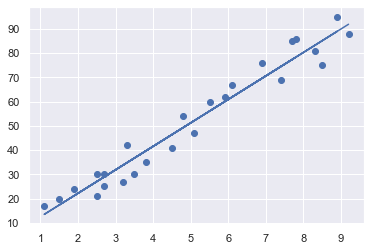

In [16]:
line = model.coef_*X_train + model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X_train, line)
plt.show()

# Comparing Actual vs Predicted

In [17]:
pred = model.predict(X_test)

In [18]:
predictiondata = pd.DataFrame({'test_studyhours': X_test['study_hours'], 'actual_percentscores': y_test, 'predicted_percentscores': pred})  
predictiondata

,test_studyhours,actual_percentscores,predicted_percentscores
8,8.3,81.0,83.188141
16,2.5,30.0,27.032085
0,2.5,21.0,27.032085
23,6.9,76.0,69.633224
11,5.9,62.0,59.951149


In [19]:
#r2_score (coefficient of determination) regression score function.
r2_score(y_test, pred)

0.9678055220603294

# Evaluating the model 

In [20]:
print('MAE:')
print(mean_absolute_error(y_test, pred), end='\n')
print('MSE:')
print(mean_squared_error(y_test, pred), end='\n')
print('RMSE:')
print(np.sqrt(mean_squared_error(y_test, pred)))

MAE:
3.9207535
MSE:
18.943232
RMSE:
4.352382


# What will be predicted score if a student study for 9.25 hrs in a day?

In [21]:
hours = pd.DataFrame({'study_hours': [9.25]})
unseenpred = model.predict(hours)
print("No of Hours = {}".format(hours['study_hours'][0]))
print("Predicted Score = {}".format(unseenpred[0]))

No of Hours = 9.25
Predicted Score = 92.38610887527466


# Conclusion

#              I was successfully able to carry-out Prediction using Supervised ML task and was able to evaluate the model's performance on various parameters.

# Thank You